# Module Title:	 Data Visualization Techniques   
### Assessment Title: CA1_DVis_HDip_Lvl8  
### Lecturer Name:	 David McQuaid  
### Student Full Name & Student ID:	Natalia de Oliveira Rodrigues 2023112

Link to my GitHub Repository: https://github.com/norodrigues111/Data-Visualization-Techniques.git

**Scenario:**  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
  
Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python.  
   
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   


**Requirements:** 
  
You are required to use the dataset contained within the file “board_games.csv” and then answer the following questions:  

Part 1: (Column Names are denoted by quotation marks)  (30 marks)
  
•	What are the top 5 “average rated” games?  
•	Is there a correlation between the “users_rated” and the “max_playtime”?  
•	What is the distribution of game categories? (You may not use a barchart)
•	Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)?  
•	What are the 5 most common “mechanics” in the dataset?  


Part 2  (20 marks)
  
•	You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario.

Part3:  (50 marks)
  
You must explain, in detail,    
•	why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  
•	why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
•	what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
•	what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)  



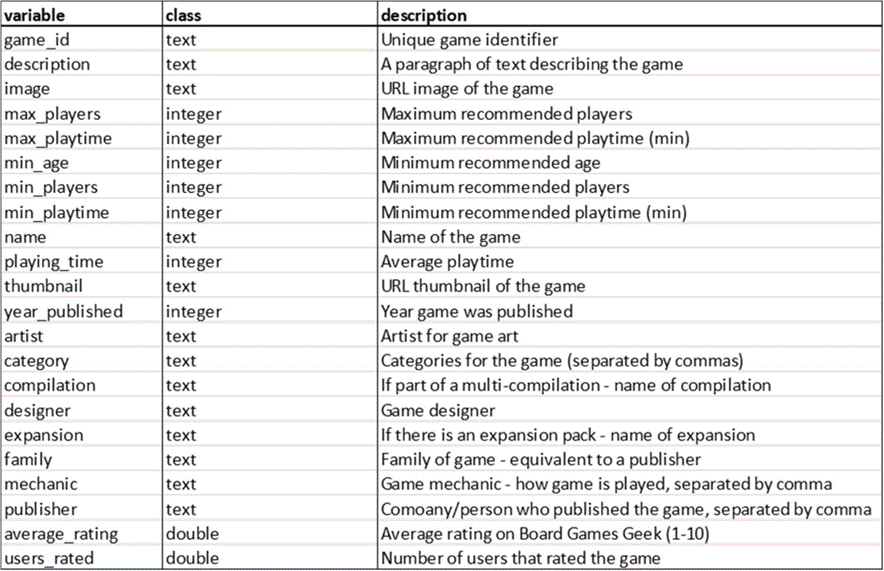

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
#sns.set()
import matplotlib.pyplot as plt
%matplotlib inline 


### Exploration Data Analysis

In [46]:
df = pd.read_csv('../../data/board_games.csv')
df.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [48]:
df.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


In [72]:
df.isnull().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

### PART 1:
    What are the top 5 “average rated” games? 
    Is there a correlation between the “users_rated” and the “max_playtime”? 
    What is the distribution of game categories? (You may not use a barchart)
    Do older games (1992 and earlier) have a higher MEDIAN “average rating” than newer games (after 1992)? 
    What are the 5 most common “mechanics” in the dataset? 

In [73]:
df.name.nunique()

10357

In [74]:
top5_avg_rated_df= df.sort_values(by='average_rating', ascending=False).head()
top5_avg_rated_df

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
8348,140135,Small World's Designer Edition is a spare-no-e...,//cf.geekdo-images.com/images/pic2270432.jpg,6,80,8,2,40,Small World Designer Edition,80,...,"Miguel Coimbra,Cyrille Daujean","Civilization,Fantasy,Territory Building","Small World,Small World: 6 Player Board,Small ...",Philippe Keyaerts,NaN,"Crowdfunding: Kickstarter,Small World","Area Control / Area Influence,Area Movement,Di...",Days of Wonder,9.00392,180
6392,55690,Kingdom Death: Monster is a fully cooperative ...,//cf.geekdo-images.com/images/pic2931007.jpg,6,180,17,1,60,Kingdom Death: Monster,180,...,"Lokman Lam,Lorinda Tomko","Adventure,Fantasy,Horror,Mature / Adult,Miniat...",NaN,Adam Poots,Kingdom Death: Monster – A Strange Spot and Be...,"Campaign Games,Crowdfunding: Kickstarter,Kingd...","Co-operative Play,Dice Rolling,Grid Movement,R...",Kingdom Death,8.93184,1954
9964,181289,"Terra Mystica: Big Box, a Korean crowdfunding ...",//cf.geekdo-images.com/images/pic2602334.jpg,5,150,12,2,60,Terra Mystica: Big Box,150,...,Dennis Lohausen,"Civilization,Economic,Fantasy,Territory Building","Terra Mystica,Terra Mystica: Fire & Ice","Jens Drögemüller,Helge Ostertag",NaN,Terra Mystica,"Route/Network Building,Variable Player Powers","Feuerland Spiele,Korea Boardgames co., Ltd.",8.84862,109
8526,144574,(from MMP website:)&#10;&#10;Last Chance for V...,//cf.geekdo-images.com/images/pic1875530.jpg,2,60,15,2,60,Last Chance for Victory,60,...,"Dean Essig,Gettysburg Cyclorama","American Civil War,Civil War,Wargame",NaN,Dean Essig,NaN,Line of Battle Series,"Dice Rolling,Hex-and-Counter",Multi-Man Publishing,8.84603,88
9675,173504,"The Greatest Day: Sword, Juno, and Gold Beache...",//cf.geekdo-images.com/images/pic2422496.jpg,8,6000,12,2,60,"The Greatest Day: Sword, Juno, and Gold Beaches",6000,...,Nicolás Eskubi,"Wargame,World War II",NaN,Adam Starkweather,NaN,Grand Tactical Series,Chit-Pull System,Multi-Man Publishing,8.83081,86


In [80]:
top5_avg_rated_df['average_rating'] = top5_avg_rated_df['average_rating'].round(2)
top5_avg_rated_df

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
8348,140135,Small World's Designer Edition is a spare-no-e...,//cf.geekdo-images.com/images/pic2270432.jpg,6,80,8,2,40,Small World Designer Edition,80,...,"Miguel Coimbra,Cyrille Daujean","Civilization,Fantasy,Territory Building","Small World,Small World: 6 Player Board,Small ...",Philippe Keyaerts,NaN,"Crowdfunding: Kickstarter,Small World","Area Control / Area Influence,Area Movement,Di...",Days of Wonder,9.00,180
6392,55690,Kingdom Death: Monster is a fully cooperative ...,//cf.geekdo-images.com/images/pic2931007.jpg,6,180,17,1,60,Kingdom Death: Monster,180,...,"Lokman Lam,Lorinda Tomko","Adventure,Fantasy,Horror,Mature / Adult,Miniat...",NaN,Adam Poots,Kingdom Death: Monster – A Strange Spot and Be...,"Campaign Games,Crowdfunding: Kickstarter,Kingd...","Co-operative Play,Dice Rolling,Grid Movement,R...",Kingdom Death,8.93,1954
9964,181289,"Terra Mystica: Big Box, a Korean crowdfunding ...",//cf.geekdo-images.com/images/pic2602334.jpg,5,150,12,2,60,Terra Mystica: Big Box,150,...,Dennis Lohausen,"Civilization,Economic,Fantasy,Territory Building","Terra Mystica,Terra Mystica: Fire & Ice","Jens Drögemüller,Helge Ostertag",NaN,Terra Mystica,"Route/Network Building,Variable Player Powers","Feuerland Spiele,Korea Boardgames co., Ltd.",8.85,109
8526,144574,(from MMP website:)&#10;&#10;Last Chance for V...,//cf.geekdo-images.com/images/pic1875530.jpg,2,60,15,2,60,Last Chance for Victory,60,...,"Dean Essig,Gettysburg Cyclorama","American Civil War,Civil War,Wargame",NaN,Dean Essig,NaN,Line of Battle Series,"Dice Rolling,Hex-and-Counter",Multi-Man Publishing,8.85,88
9675,173504,"The Greatest Day: Sword, Juno, and Gold Beache...",//cf.geekdo-images.com/images/pic2422496.jpg,8,6000,12,2,60,"The Greatest Day: Sword, Juno, and Gold Beaches",6000,...,Nicolás Eskubi,"Wargame,World War II",NaN,Adam Starkweather,NaN,Grand Tactical Series,Chit-Pull System,Multi-Man Publishing,8.83,86


In [81]:
top5_avg_rated_df.name.unique()

array(['Small World Designer Edition', 'Kingdom Death: Monster',
       'Terra Mystica: Big Box', 'Last Chance for Victory',
       'The Greatest Day: Sword, Juno, and Gold Beaches'], dtype=object)

Improve:
rounded rating
games' names

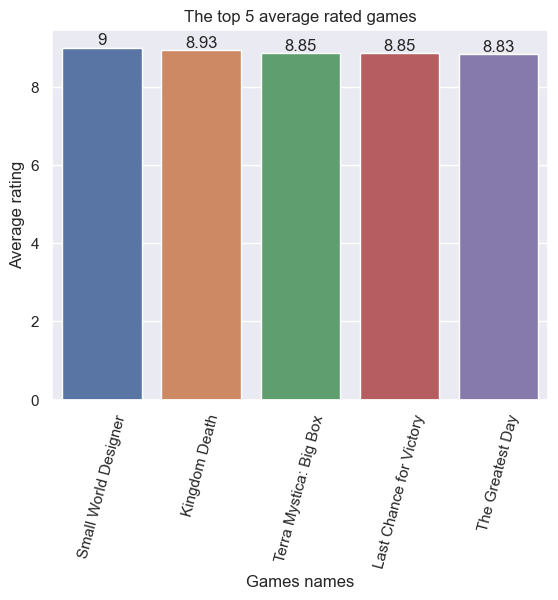

In [90]:
custom_labels=['Small World Designer', 'Kingdom Death',
       'Terra Mystica: Big Box', 'Last Chance for Victory',
       'The Greatest Day']
ax = sns.barplot(data=top5_avg_rated_df, x='name',y='average_rating')
ax.bar_label(ax.containers[0], fontsize=12);
ax.set_xticklabels(custom_labels, rotation=75)
ax.set_xlabel('Games names')
ax.set_ylabel('Average rating')
ax.set_title('The top 5 average rated games');


In [95]:
games_check=df[df['name'].str.startswith(('Terra Mystica','Small'))]
games_check

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
6079,40692,"In Small World, players vie for conquest and c...",//cf.geekdo-images.com/images/pic428828.jpg,5,80,8,2,40,Small World,80,...,"Miguel Coimbra,Cyrille Daujean","Fantasy,Fighting,Territory Building",Small World Designer Edition,Philippe Keyaerts,Community's Compendium I (fan expansion for Sm...,Small World,"Area Control / Area Influence,Area Movement,Di...","Days of Wonder,Asterion Press,Bergsala Enigma,...",7.35735,43144
7268,97786,&quot;This world's not big enough for all of u...,//cf.geekdo-images.com/images/pic979889.jpg,5,90,8,2,30,Small World Underground,90,...,"Miguel Coimbra,Cyrille Daujean","Fantasy,Fighting,Territory Building",NaN,Philippe Keyaerts,Community's Compendium I (fan expansion for Sm...,Small World,"Area Control / Area Influence,Area Movement,Di...","Days of Wonder,Edge Entertainment,Giochi Uniti...",7.37322,7084
7727,120677,In the land of Terra Mystica dwell 14 differen...,//cf.geekdo-images.com/images/pic1356616.jpg,5,150,12,2,60,Terra Mystica,150,...,Dennis Lohausen,"Civilization,Economic,Fantasy,Territory Building",Terra Mystica: Big Box,"Jens Drögemüller,Helge Ostertag","Terra Mystica: 4 Town Tiles,Terra Mystica: Bon...",Terra Mystica,"Route/Network Building,Variable Phase Order,Va...","Feuerland Spiele,Bard Centrum Gier,Cranio Crea...",8.29198,23684
8056,130486,You are the mayor of one borough of Small City...,//cf.geekdo-images.com/images/pic2552981.jpg,4,120,12,1,60,Small City,120,...,"Da-Fanny,Todd Sanders,Sampo Sikiö,Alban Viard","City Building,Economic,Territory Building",NaN,Alban Viard,Small City: Character Meeple Expansion 1 – The...,Small City,"Area Control / Area Influence,Simulation,Varia...",AVStudioGames,7.57349,356
8348,140135,Small World's Designer Edition is a spare-no-e...,//cf.geekdo-images.com/images/pic2270432.jpg,6,80,8,2,40,Small World Designer Edition,80,...,"Miguel Coimbra,Cyrille Daujean","Civilization,Fantasy,Territory Building","Small World,Small World: 6 Player Board,Small ...",Philippe Keyaerts,NaN,"Crowdfunding: Kickstarter,Small World","Area Control / Area Influence,Area Movement,Di...",Days of Wonder,9.00392,180
9843,178044,Small Star Empires is a quick area control gam...,//cf.geekdo-images.com/images/pic2947623.jpg,4,30,13,2,10,Small Star Empires,30,...,Milan Tasevski,"Science Fiction,Territory Building",NaN,Milan Tasevski,NaN,NaN,"Area Control / Area Influence,Area Enclosure,G...",Archona Games,7.33580,176
9964,181289,"Terra Mystica: Big Box, a Korean crowdfunding ...",//cf.geekdo-images.com/images/pic2602334.jpg,5,150,12,2,60,Terra Mystica: Big Box,150,...,Dennis Lohausen,"Civilization,Economic,Fantasy,Territory Building","Terra Mystica,Terra Mystica: Fire & Ice","Jens Drögemüller,Helge Ostertag",NaN,Terra Mystica,"Route/Network Building,Variable Player Powers","Feuerland Spiele,Korea Boardgames co., Ltd.",8.84862,109
